Nama : Ida Ayu Vigi Meidhyana Putri <br>
Kelas : B <br>
NIM : F1D018078 <br>

<a id="read-data"></a>
# UTS_Tugas Mandiri Mata Kuliah Machine Learning

In [84]:
import pandas as pd #struktur data dan analisis data
import numpy as np #mengolah data
from matplotlib import pyplot #memvisualisasikan data
import matplotlib.pyplot as plt
import seaborn as sns #visualisasi yang fleksible
#sklearn untuk data analisis 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
%matplotlib inline

In [3]:
data_shop = pd.read_csv('archive (8)/Fish.csv')
data_shop

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


---
# 1. Tentukan variable dependent dan independent dari dataset
---
1. Dependent : Weight
2. Independent : Length1, Length2, Length3, Height, Width

---
# 2. eksplorasi dan visualisasi data
---

In [4]:
data_shop.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
#informasi dataset
data_shop.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
#baris,kolom
data_shop.shape

(159, 7)

In [7]:
#cek tipe untuk semua kolom
data_shop.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [8]:
#menghitung jumlah duplikasi data
data_shop.duplicated().value_counts()

False    159
dtype: int64

In [9]:
#korelasi antar kolom
data_shop.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<h2>Visualisasi Data<h2>


<AxesSubplot:>

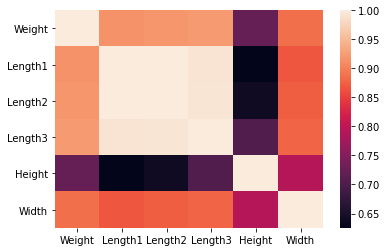

In [29]:
#heatmap adalah visualisasi yang paling cocok untuk matriks
sns.heatmap(data=data_shop.corr())

<AxesSubplot:>

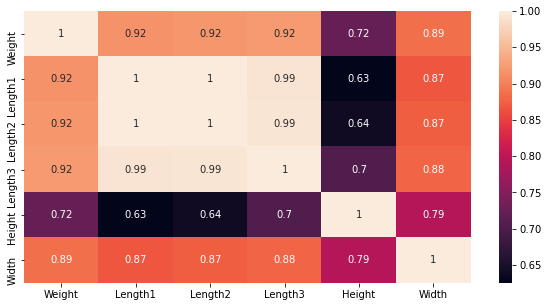

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(data_shop.corr(), annot=True)

In [31]:
#menghitung jumlah tiap species
data_shop['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

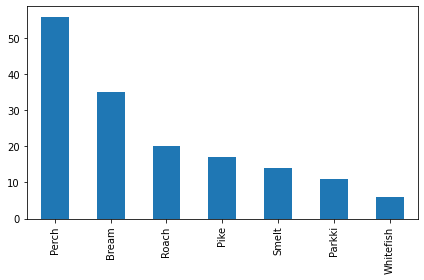

In [14]:
data_shop['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

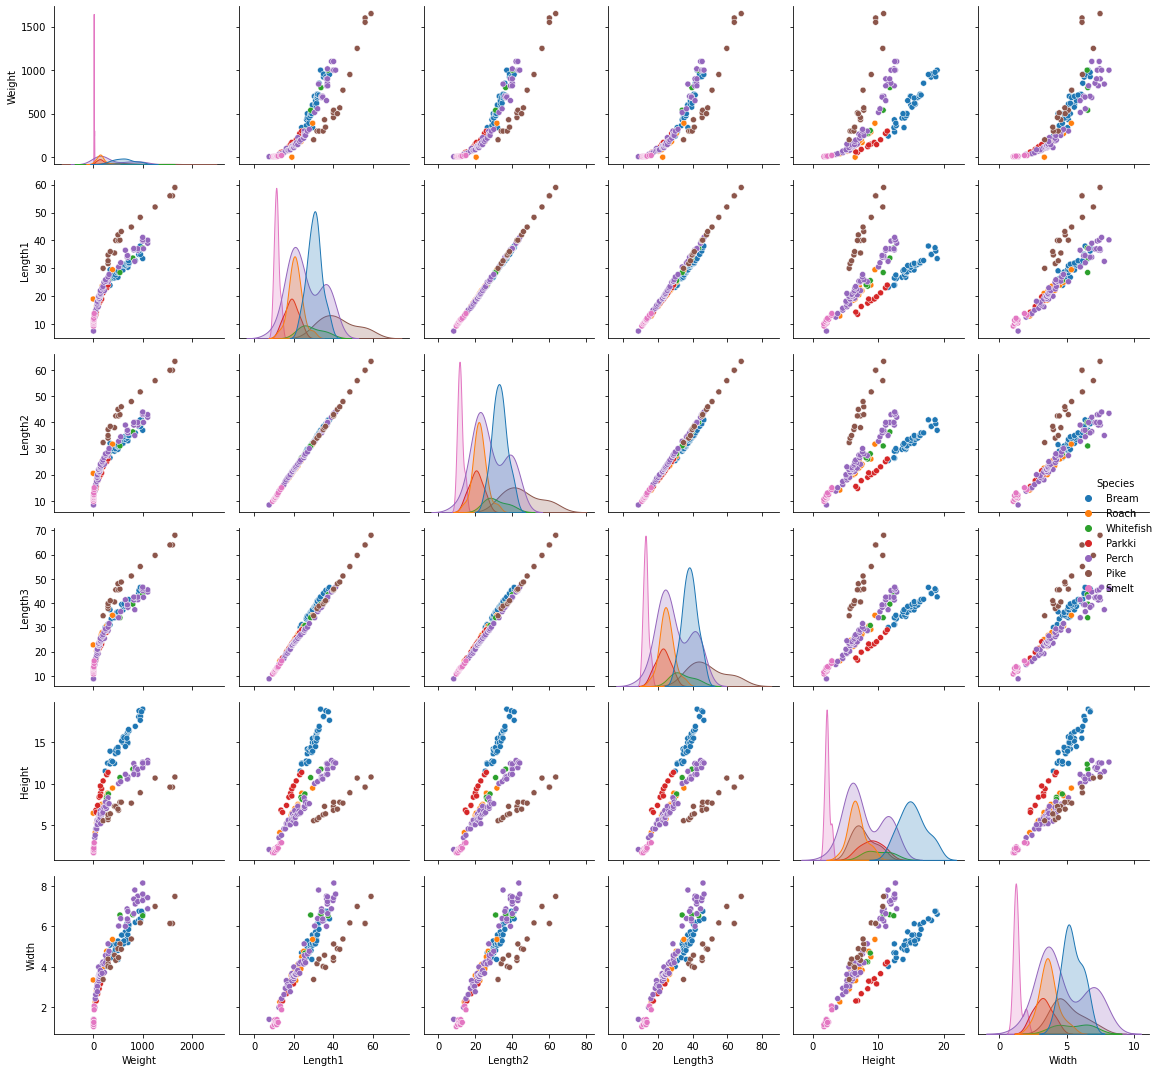

In [15]:
sns.pairplot(data_shop, hue='Species')
plt.tight_layout()

---
# 3. Lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan
---

In [32]:
#mendeteksi keberadaan nilai kosong
data_shop.isnull().values.any()

False

In [33]:
#mendeteksi keberadaan nilai kosong
data_shop.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

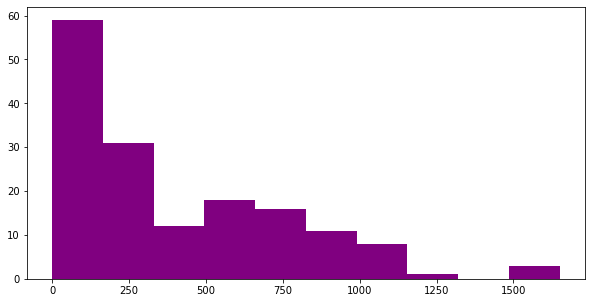

In [34]:
#find outlier
fig, ax=plt.subplots(figsize=(10,5))
ax.hist(data_shop['Weight'], bins=10, color='purple')

plt.show()

In [35]:
mean = data_shop['Weight'].mean()
std= data_shop['Weight'].std()

In [36]:
limit = 3*std

In [37]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

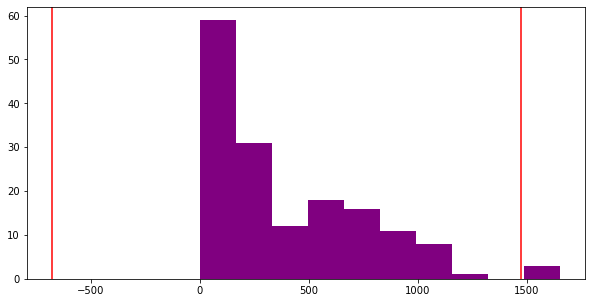

In [38]:
fig, ax=plt.subplots(figsize=(10,5))
ax.hist(data_shop['Weight'], bins=10, color='purple')

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.show()

In [39]:
(data_shop['Weight'] < limit_bawah).sum()

0

In [40]:
(data_shop['Weight'] > limit_atas).sum()

3

In [41]:
data_shop2 = data_shop[(data_shop['Weight'] > limit_bawah) & (data_shop['Weight'] < limit_atas)]

In [42]:
data_shop2

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


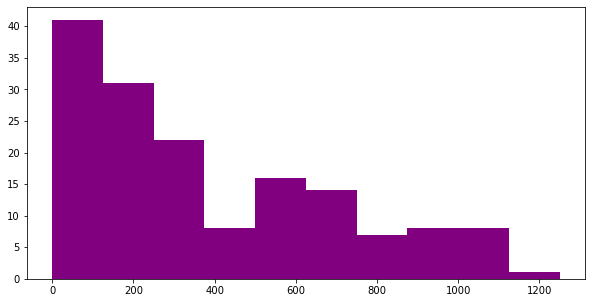

In [43]:
#find outlier
fig, ax=plt.subplots(figsize=(10,5))
ax.hist(data_shop2['Weight'], bins=10, color='purple')

plt.show()

---
# 4. Lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi. 
# 5. Analisa dan jelaskan hasil evaluasi pemodelan regresi
---

<h2>Linear<h2>

In [44]:
# Menggunakan linear regression dari objek sklearn.linear_model
model_lin = LinearRegression()

<AxesSubplot:>

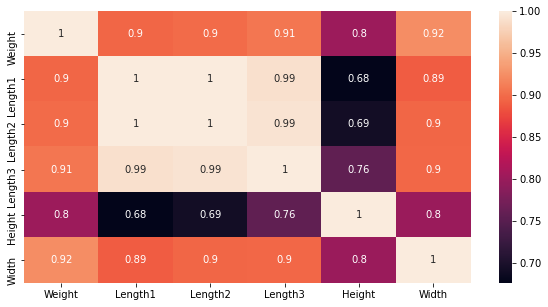

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(data_shop2.corr(), annot=True)

untuk melihat variabel independent mana yang paling bagus digunakan pada data yang telah dilakukan pembersihan outlier.

In [46]:
model_lin.fit(data_shop2[['Width']], data_shop2.Weight)

LinearRegression()

In [47]:
model_lin.intercept_

-396.93703896124396

intercept merupakan nilai dari b karena regresi rumusnya yaitu y = mx + b

In [48]:
model_lin.coef_

array([176.46341228])

coef merupakan nilai dari m karena regresi rumusnya yaitu y = mx + b

In [50]:
model_lin.predict([[3]])

array([132.45319789])

3 merupakan nilai dari Width. Jadi jika misalnya menggunakan Width dengan nilai 3 maka kurang lebih nilai yang dihasilkan yaitu 132.45319789

In [52]:
#cek menggunakan nilai b dan m yang telah dicari sebelumnya, lalu masukkan ke rumus regresi dengan x = 3 sesuai nilai Width yang dimasukkan sebelumnya
176.46341228*3+(-396.93703896124396)

132.453197878756

<h2>Linear Berganda<h2>

In [55]:
model_mul = LinearRegression()
model_mul.fit(data_shop2[["Length1", "Length2", "Length3", "Height", "Width"]], data_shop2.Weight)

LinearRegression()

In [59]:
model_mul.intercept_

-426.943382540956

In [58]:
model_mul.coef_

array([102.55793826, -45.07632353, -37.14754696,  36.84662488,
        52.40221978])

In [60]:
model_mul.predict([[30, 20, 25, 10, 5]])

array([1450.05696834])

In [62]:
#cek hasil dengan rumus
rumus = 102.55793826*30+-45.07632353*20+-37.14754696*25+36.84662488*10+52.40221978*5+-426.943382540956
print("Normal        : ", rumus)
print("With Rounding : ", rumus)


Normal        :  1450.0569683590438
With Rounding :  1450.0569683590438


---
# 6. lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang awalnya bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas).
# 7. Analisa dan jelaskan hasil evaluasi pemodelan regresi logistik
---

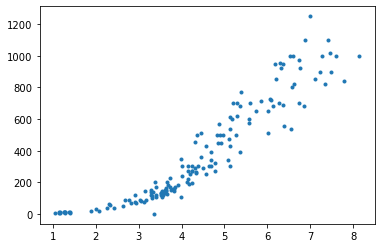

In [63]:
plt.scatter(data_shop2.Width, data_shop2.Weight, marker='.')

Persebaran data, sumbu x mewakili Width dan sumbu y mewakili Weight

In [74]:
data_shop['Weight'].head(10)

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
5    450.0
6    500.0
7    390.0
8    450.0
9    500.0
Name: Weight, dtype: float64

### Logistic Regression Dengan 2 Kelas (Ringan & Berat)

In [97]:
bins1 = np.linspace(min(data_shop2["Weight"]), max(data_shop2["Weight"]), 3)

In [98]:
group_names1 = ['Ringan', 'Berat']

In [99]:
data_shop2['Weight-binned1'] = pd.cut(data_shop2['Weight'], bins1, labels=group_names1,include_lowest=True)
data_shop2[['Weight', 'Weight-binned1']].head(30)

<ipython-input-99-06c3d97f16ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop2['Weight-binned1'] = pd.cut(data_shop2['Weight'], bins1, labels=group_names1,include_lowest=True)


,Weight,Weight-binned1
0,242,Ringan
1,290,Ringan
2,340,Ringan
3,363,Ringan
4,430,Ringan
5,450,Ringan
6,500,Ringan
7,390,Ringan
8,450,Ringan
9,500,Ringan


In [100]:
data_shop2['Weight-binned1'].value_counts()

Ringan    118
Berat      38
Name: Weight-binned1, dtype: int64

<BarContainer object of 2 artists>

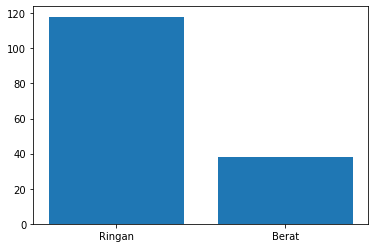

In [102]:
pyplot.bar(group_names1, data_shop2["Weight-binned1"].value_counts())

In [103]:
model_log1 = LogisticRegression()

In [104]:
model_log1.fit(data_shop2[['Width']], data_shop2['Weight-binned1'])

LogisticRegression()

In [105]:
model_log1.predict([[6]])

array(['Berat'], dtype=object)

In [106]:
model_log1.predict([[2]])

array(['Ringan'], dtype=object)

### Logistic Regression Dengan 3 Kelas (Ringan, Sedang, Berat)

In [75]:
data_shop2["Weight"].replace(np.nan, -1, inplace=True)
data_shop2["Weight"] = data_shop2["Weight"].astype(int, copy=True)
data_shop2["Weight"].replace(-1, np.nan, inplace=True)

<ipython-input-75-6653f3af2ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop2["Weight"] = data_shop2["Weight"].astype(int, copy=True)


In [76]:
bins = np.linspace(min(data_shop2["Weight"]), max(data_shop2["Weight"]), 4)

In [77]:
group_names = ['Ringan', 'Sedang', 'Berat']

In [81]:
data_shop2['Weight-binned'] = pd.cut(data_shop2['Weight'], bins, labels=group_names,include_lowest=True)
data_shop2[['Weight', 'Weight-binned']].head(50)

<ipython-input-81-49867c5f8f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop2['Weight-binned'] = pd.cut(data_shop2['Weight'], bins, labels=group_names,include_lowest=True)


,Weight,Weight-binned
0,242,Ringan
1,290,Ringan
2,340,Ringan
3,363,Ringan
4,430,Sedang
5,450,Sedang
6,500,Sedang
7,390,Ringan
8,450,Sedang
9,500,Sedang


In [92]:
data_shop2['Weight-binned'].value_counts()

Ringan    96
Sedang    40
Berat     20
Name: Weight-binned, dtype: int64

<BarContainer object of 3 artists>

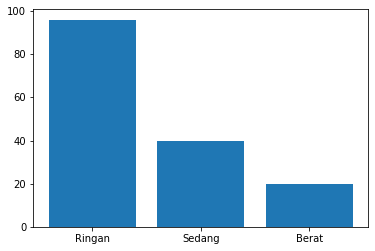

In [95]:
pyplot.bar(group_names, data_shop2["Weight-binned"].value_counts())

In [85]:
model_log = LogisticRegression()

In [88]:
model_log.fit(data_shop2[['Width']], data_shop2['Weight-binned'])

LogisticRegression()

In [89]:
model_log.predict([[6]])

array(['Sedang'], dtype=object)

In [90]:
model_log.predict([[2]])

array(['Ringan'], dtype=object)